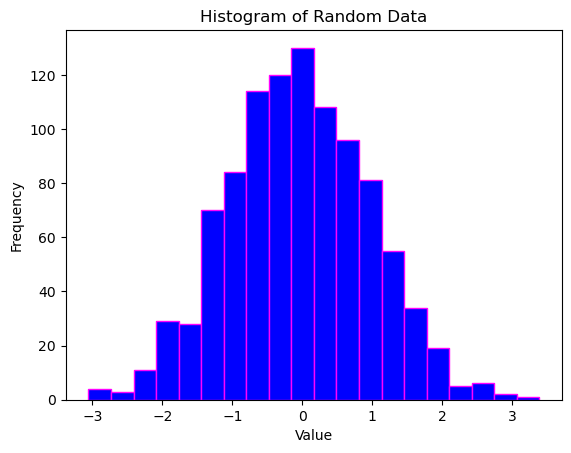

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your own data)
data = np.random.randn(1000)  # Generate 1000 random numbers from a standard normal distribution

# Create the histogram with customizable parameters

delimiter = [1,11,21,31,41,51,61,71,81,91,101]

plt.hist(data               ,    # data
        #bins=delimiter     ,    # delimiter   
         bins=20            ,    # Number of bins (default: 10)
         range=None         ,    # Set x-axis range (optional)
         density=False      ,    # Normalize by total count (optional)
         color='blue'       ,    # Color of the bars (default: None)
         histtype='bar'     ,    # Type of histogram (default: 'bar')
         alpha=None         ,    # Transparency of bars (optional)
         label='My data'    ,    # Label for the data (optional)
         ec='magenta')

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Random Data")

# Show the plot
plt.show()



In [ ]:
import pandas as pd
import os
import glob

path = "./database/PPI"

excel_files = glob.glob(os.path.join(path, "*.xlsx"))       # Retrieve all Excel files in the folder (matching the '.xlsx' pattern)

dataframes = {}                                             # Initialize an empty dictionary to store DataFrames

for file_path in excel_files:
    if os.path.basename(file_path) == "readme.txt":         # Skip the 'readme.txt' file
        continue

    df = pd.read_excel(file_path)                           # Read the Excel file into a DataFrame

    file_name = os.path.basename(file_path)                 # Extract the file name (excluding the path)

    dataframes[file_name] = df                              # Store the DataFrame in the dictionary using the file name as the key

# Now 'dataframes' contains all the DataFrames from Excel files
# You can access them using their respective file names

# for file_name, df in dataframes.items():
#     print(f"File: {file_name}")
#     print(df)                                               # Display the content of each DataFrame
#     print("-" * 40)                                         # Separator


i = 0
for file_name in dataframes.keys():
    print(f"""{i} : {file_name}""")
    i += 1

In [ ]:
def get_dataframe(name):
    df = dataframes[name].iloc[9:,:]
    line = df

    months_list = []

    for i in line:
        months_list.append(line[i].values[0])

    df.columns = months_list
    df = df[1:]
    df = df.set_index("Year")
    return df

In [11]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)

In [12]:
df['FlightNumber']

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int64